![HACKTIV8](datasets/h8.png)

---
# Assignment 2

#### Gladis Hafifah
---

---
## Project Overview

Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.
---

## Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats as stats
from scipy.stats import kendalltau

In [2]:
data = pd.read_csv('datasets/nyc-rolling-sales.csv')

In [3]:
pd.set_option('display.max.columns', None)
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
data.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


## Deskripsi Atribut

In [5]:
data.shape

(84548, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [7]:
data.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

In [8]:
data.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


## Missing Data

In [9]:
data.drop(columns=['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER'], inplace=True)
data.shape

(84548, 19)

In [10]:
data['BOROUGH'] = data.BOROUGH.replace({1: 'Manhattan', 2: 'Bronk', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Islands'})
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [11]:
# mengubah tipe untuk beberapa kolom menjadi numeric
num = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

for col in num:
    data[col]=pd.to_numeric(data[col], errors="coerce")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         84548 non-null  object 
 1   NEIGHBORHOOD                    84548 non-null  object 
 2   BUILDING CLASS CATEGORY         84548 non-null  object 
 3   TAX CLASS AT PRESENT            84548 non-null  object 
 4   BLOCK                           84548 non-null  int64  
 5   LOT                             84548 non-null  int64  
 6   BUILDING CLASS AT PRESENT       84548 non-null  object 
 7   ADDRESS                         84548 non-null  object 
 8   ZIP CODE                        84548 non-null  int64  
 9   RESIDENTIAL UNITS               84548 non-null  int64  
 10  COMMERCIAL UNITS                84548 non-null  int64  
 11  TOTAL UNITS                     84548 non-null  int64  
 12  LAND SQUARE FEET                

In [13]:
data.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [14]:
print(sum(data.duplicated()))
data[data.duplicated(keep=False)].sort_values(['LAND SQUARE FEET', 'GROSS SQUARE FEET']).head()

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
19402,Bronk,BRONXDALE,13 CONDOS - ELEVATOR APARTMENTS,2,4340,1005,R4,610 WARING AVENUE,10467,1,0,1,0.0,0.0,1957,2,R4,10.0,2017-04-13 00:00:00
19403,Bronk,BRONXDALE,13 CONDOS - ELEVATOR APARTMENTS,2,4340,1005,R4,610 WARING AVENUE,10467,1,0,1,0.0,0.0,1957,2,R4,10.0,2017-04-13 00:00:00
19415,Bronk,BRONXDALE,13 CONDOS - ELEVATOR APARTMENTS,2,4340,1253,R4,2385 BARKER AVENUE,10467,1,0,1,0.0,0.0,1958,2,R4,10.0,2017-04-13 00:00:00
19416,Bronk,BRONXDALE,13 CONDOS - ELEVATOR APARTMENTS,2,4340,1253,R4,2385 BARKER AVENUE,10467,1,0,1,0.0,0.0,1958,2,R4,10.0,2017-04-13 00:00:00
19419,Bronk,BRONXDALE,13 CONDOS - ELEVATOR APARTMENTS,2,4340,1263,R4,2385 BARKER AVENUE,10467,1,0,1,0.0,0.0,1958,2,R4,0.0,2017-07-20 00:00:00


In [15]:
data.drop_duplicates(inplace=True) #menghapus missing value
print(sum(data.duplicated()))

0


In [16]:
data['LAND SQUARE FEET'].fillna(data['LAND SQUARE FEET'].mean(), inplace=True)
data['GROSS SQUARE FEET'].fillna(data['GROSS SQUARE FEET'].mean(), inplace=True)
data['SALE PRICE'].fillna(data['SALE PRICE'].mean(), inplace=True)

In [17]:
data.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [18]:
data.shape #mengecheck kembali data setelah menghapus missing value

(83783, 19)

## Melakukan pengecekan outlier

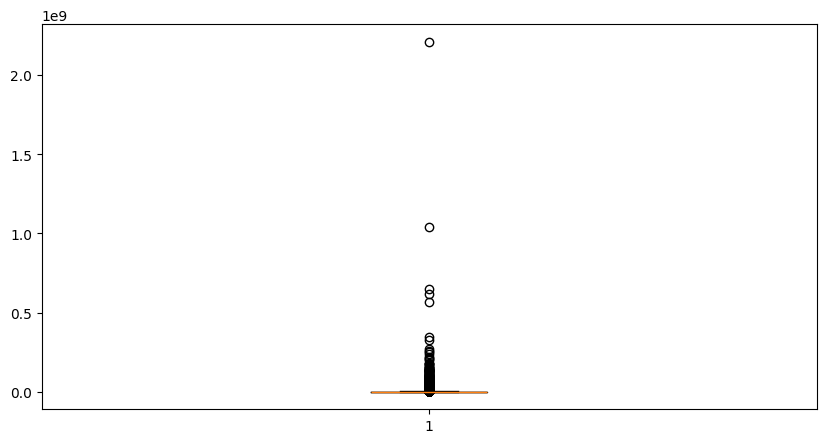

In [19]:
plt.figure(figsize=(10,5))
plt.boxplot(data['SALE PRICE'])
plt.show()

In [20]:
mean_sale = data['SALE PRICE'].mean()
print(mean_sale)

1280703.000301694


In [21]:
std_sale = data['SALE PRICE'].std()
print(std_sale)

10418568.398673642


In [22]:
limit = 3*std_sale

In [23]:
limit_atas = mean_sale + 3*std_sale
limit_bawah = mean_sale - 3*std_sale

print('Limit Atas:', limit_atas)
print('Limit Bawah:', limit_bawah)

Limit Atas: 32536408.19632262
Limit Bawah: -29975002.195719235


In [24]:
print((data['SALE PRICE'] < limit_bawah).sum())
print((data['SALE PRICE'] > limit_atas).sum())

0
190


In [25]:
data_nyc = data[(data['SALE PRICE']>limit_bawah) & (data['SALE PRICE'] < limit_atas)]

In [26]:
print((data_nyc['SALE PRICE'] > limit_atas).sum())

0


In [27]:
data_nyc.shape

(83593, 19)

In [28]:
data_nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6.625000e+06,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,1.280703e+06,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,1.280703e+06,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3.936272e+06,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8.000000e+06,2016-11-17 00:00:00


---
---

## Measure of Central Tendency
### Mean : Berapakah rata rata harga di setiap distriknya dan tentukanlah wilayah mana yang memiliki harga rata rata tertinggi.

In [29]:
borough_saleprice = data_nyc[['BOROUGH', 'SALE PRICE']]
borough_saleprice.head()

,BOROUGH,SALE PRICE
0,Manhattan,6.625000e+06
1,Manhattan,1.280703e+06
2,Manhattan,1.280703e+06
3,Manhattan,3.936272e+06
4,Manhattan,8.000000e+06


In [30]:
data_borough = borough_saleprice.groupby('BOROUGH').mean().sort_values(by='SALE PRICE', ascending=False)
data_borough

,SALE PRICE
BOROUGH,
Manhattan,2.104012e+06
Queens,8.591979e+05
Staten Islands,7.262215e+05
Brooklyn,7.248307e+05
Bronk,5.130516e+05


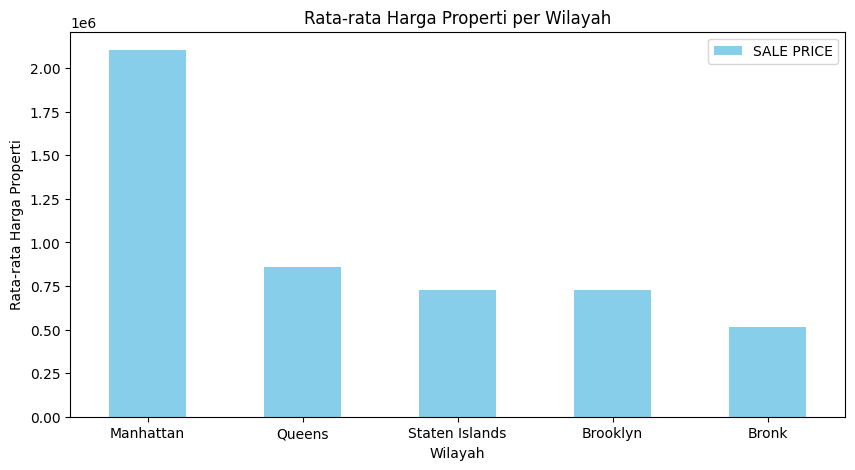

In [31]:
data_borough.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Rata-rata Harga Properti per Wilayah')
plt.xlabel('Distrik')
plt.ylabel('Rata-rata Harga Properti')
plt.xticks(rotation=0)

plt.show()

**Insight:**
- Rata rata harga di setiap Distriknya yaitu, Manhattan: $2104012, Queens: $859197, Staten Islands: $726221, Brooklyn: $724830, Bronk: $513051
- Berdasarkan bar chart diatas dapat dilihat bahwa distrik Manhattan merupakan distrik yang memiliki harga rata rata penjualan tertinggi.

---
---

### Median: Berpakah nilai tengah dari land Square feet dan gross square feet?

In [32]:
median_LSF = data_nyc['LAND SQUARE FEET'].median()
median_GSF = data_nyc['GROSS SQUARE FEET'].median()

print(median_LSF)
print(median_GSF)


3165.0
2504.0


**Insight:**
- Median atau nilai tengah dari Land Square Feet adalah 3165
- Median atau nilai tengah dari Gross Square Feet adalah 2504

---
---

### Modus: Menentukan distrik dan building class category mana yang paling sering muncul

In [33]:
data_bbcc=data_nyc[['BOROUGH', 'BUILDING CLASS CATEGORY']]
data_bbcc.head()

,BOROUGH,BUILDING CLASS CATEGORY
0,Manhattan,07 RENTALS - WALKUP APARTMENTS
1,Manhattan,07 RENTALS - WALKUP APARTMENTS
2,Manhattan,07 RENTALS - WALKUP APARTMENTS
3,Manhattan,07 RENTALS - WALKUP APARTMENTS
4,Manhattan,07 RENTALS - WALKUP APARTMENTS


In [34]:
data_bbcc.nunique()

BOROUGH                     5
BUILDING CLASS CATEGORY    47
dtype: int64

In [35]:
modus_borough = data_bbcc['BOROUGH'].mode().iloc[0]
modus_building_class = data_bbcc['BUILDING CLASS CATEGORY'].mode().iloc[0]

print('Modus distrik adalah:', modus_borough)
print('Modus building class category adalah:', modus_building_class)

Modus borough adalah: Queens
Modus building class category adalah: 01 ONE FAMILY DWELLINGS                    


**Insight:**
- Distrik yang paling sering muncul dalam data property sales terebut adalah distrik Queens dari 5 distrik lainnya.
- Building class yang paling sering muncul dalam data property sales tersebut adalah 01 ONE FAMILY DWELLINGS dari 47 building category lainnya

---
---

## Measure of Spread
### Tentukan range, variance dan standard deviasi untuk sale price berdasarkan Tax class at present

In [36]:
data_tax=data_nyc[['TAX CLASS AT PRESENT', 'SALE PRICE']]
data_tax.head()

,TAX CLASS AT PRESENT,SALE PRICE
0,2A,6.625000e+06
1,2,1.280703e+06
2,2,1.280703e+06
3,2B,3.936272e+06
4,2A,8.000000e+06


In [37]:
data_tax.nunique()

TAX CLASS AT PRESENT      11
SALE PRICE              9836
dtype: int64

In [38]:
range = np.ptp(data_tax['SALE PRICE'])
print('Range sale price berdasarkan Tax Class at Present:', range)

Range sale price berdasarkan Tax Class at Present: 32250000.0


In [39]:
variance = statistics.variance(data_tax['SALE PRICE'])
print('Variance sale price berdasarkan Tax Class at Present:', variance)

Variance sale price berdasarkan Tax Class at Present: 3537648936832.556


In [40]:
standard = statistics.stdev(data_tax['SALE PRICE'])
print('Standard Deviation sale price berdasarkan Tax Class at Present:', standard)

Standard Deviation sale price berdasarkan Tax Class at Present: 1880863.8804635906


---
---
## Probability Distribution
### Apakah distribusi harga properti di seluruh kota NYC menyerupai distribusi normal?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15136\3631292896.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_nyc['SALE PRICE'],
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instea

[Text(0.5, 0, 'Sale Price'), Text(0.5, 1.0, 'Distribusi Harga Jual Bangunan')]

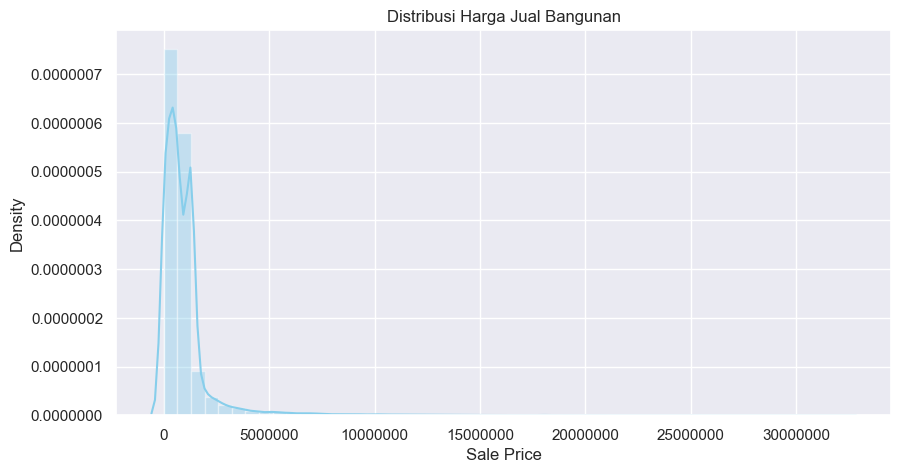

In [41]:
sns.set(rc={"figure.figsize": (10, 5)})

ax = sns.distplot(data_nyc['SALE PRICE'],
                  kde=True,
                  color='skyblue')
ax.ticklabel_format(style='plain')
ax.set(xlabel='Sale Price', title='Distribusi Harga Jual Bangunan')

Berdasarkan data visual diatas menampilkan harga jual properti tidak menyerupai distribusi normal dikarenakan kurva tidak menyerupai lonceng dan skewnesnya condong ke kiri, maka dengan itu saya mencoba membuat data sale price tersebut menjadi distribusi normal

In [42]:
data_saleprice = data_nyc[(data_nyc['SALE PRICE'] > 1000) & (data_nyc['SALE PRICE'] < 1000000)]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15136\1260720139.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_saleprice['SALE PRICE'],
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating 

[Text(0.5, 0, 'Sale Price'), Text(0.5, 1.0, 'Distribusi Harga Jual Bangunan')]

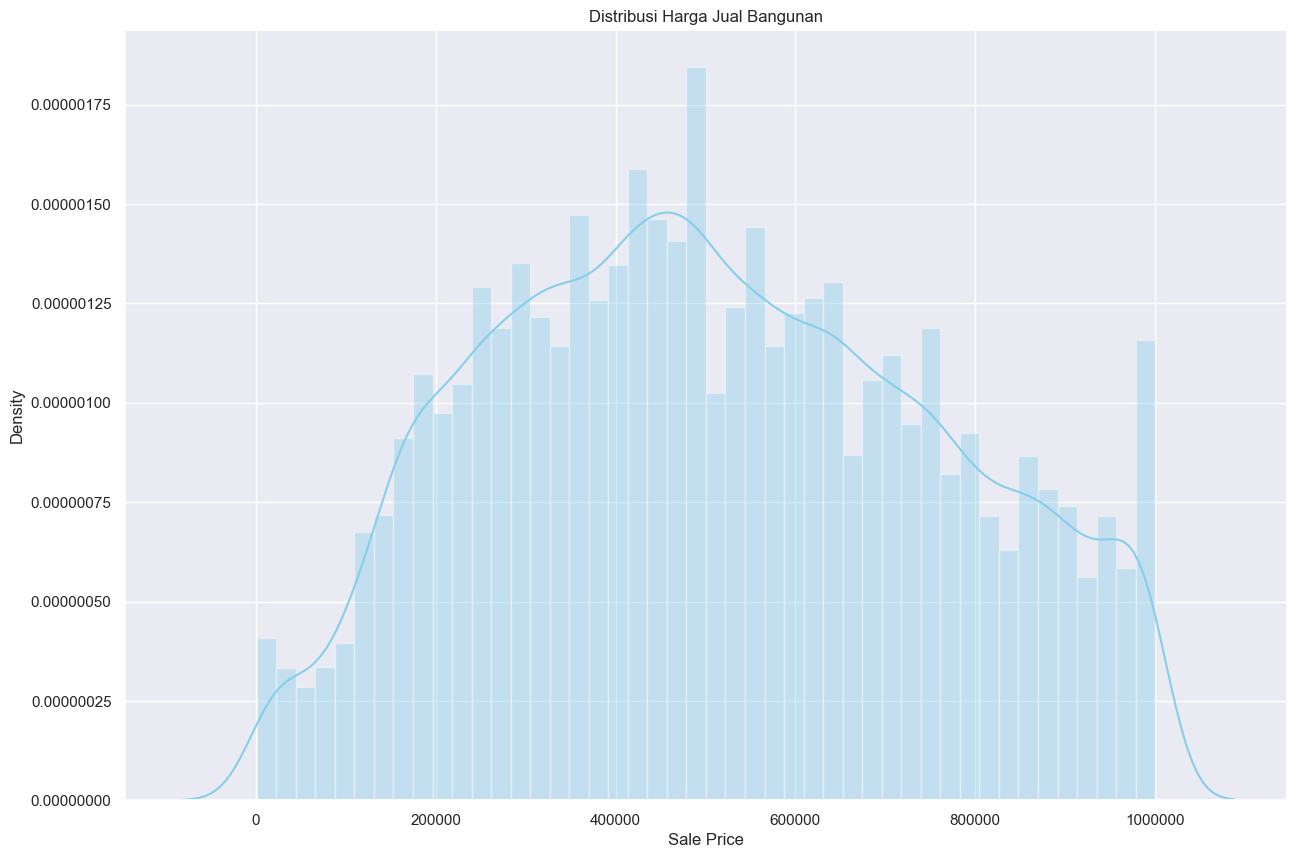

In [43]:
sns.set(rc={"figure.figsize": (15, 10)})

ax = sns.distplot(data_saleprice['SALE PRICE'], kde=True, color='skyblue')
ax.ticklabel_format(style='plain')
ax.set(xlabel='Sale Price', title='Distribusi Harga Jual Bangunan')

---
---

## Confidence Intervals
### Bagaimana Confidence Intervals dari sale price?

In [44]:
sale_price = data_nyc['SALE PRICE'] #Ambil kolom sale price
confidence_interval = stats.t.interval(0.95, len(sale_price) - 1, loc=sale_price.mean(), scale=stats.sem(sale_price)) #menghitung rentang kepercayaan

# Output hasil
print("Rentang kepercayaan 95% untuk Sale Price:")
print(confidence_interval)

Rentang kepercayaan 95% untuk Sale Price:
(1033742.2477603694, 1059243.222776082)


**Insight:**
- Berdasarkan hasil di atas, bahwa rata-rata sale price berada di antara 1033742.24 hingga 1059243.22 dengan peluang atau intervals kepercayaan 0.95 atau 95%

---
---

## Hypothesis Testing
### Apakah luasnya atau besarnya Gross Square Feet mempengaruhi pada harga jual?

In [45]:
gsf = data_nyc['GROSS SQUARE FEET']
sp = data_nyc['SALE PRICE']

stat, p = kendalltau(gsf, sp)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Probability Independent')
else :
    print('Probability Dependent')

stat=0.213, p=0.000
Probability Dependent


**Insight:**
- Berdasarkan hasil di atas, menyatakan bahwa gross square feet sangat berpengaruh pada sale price

---